<a href="https://colab.research.google.com/github/Eduardo-Osoi/PYTHON/blob/main/PROYECTO_FINAL_PYTHO_RAMDO_FOREST_%26_LINEAR_REFRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #crear los date frase dt
import numpy as np # matematicas
import seaborn as sns # mejorar las graficas
import matplotlib.pyplot as plt # graficas

In [ ]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Debe incluir el enlace completo al archivo csv que contiene su conjunto de datos
students_df = pd.read_csv("/content/drive/MyDrive/datos_python/study_performance.csv")

In [ ]:
students_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
score_columns = [columna for columna in students_df.columns if columna.endswith('score')]
score_columns

['math_score', 'reading_score', 'writing_score']

In [ ]:
students_df['score'] = round(students_df[score_columns].sum(axis=1)/30)
students_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,7.0
1,female,group C,some college,standard,completed,69,90,88,8.0
2,female,group B,master's degree,standard,none,90,95,93,9.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,5.0
4,male,group C,some college,standard,none,76,78,75,8.0
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,9.0
996,male,group C,high school,free/reduced,none,62,55,55,6.0
997,female,group C,high school,free/reduced,completed,59,71,65,6.0
998,female,group D,some college,standard,completed,68,78,77,7.0


In [ ]:
students_df.drop(columns=score_columns, inplace=True)
students_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,score
0,female,group B,bachelor's degree,standard,none,7.0
1,female,group C,some college,standard,completed,8.0
2,female,group B,master's degree,standard,none,9.0
3,male,group A,associate's degree,free/reduced,none,5.0
4,male,group C,some college,standard,none,8.0
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,9.0
996,male,group C,high school,free/reduced,none,6.0
997,female,group C,high school,free/reduced,completed,6.0
998,female,group D,some college,standard,completed,7.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder



In [ ]:
encoder = OneHotEncoder(sparse_output=False)

In [ ]:
encoded_data = encoder.fit_transform(students_df[['gender']])
encoded_data

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['gender']))
encoded_df

,gender_female,gender_male
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
995,1.0,0.0
996,0.0,1.0
997,1.0,0.0
998,1.0,0.0


In [ ]:
students_df = pd.concat([students_df, encoded_df], axis=1)
students_df.drop('gender' , axis= 1, inplace = True)
students_df

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,score,gender_female,gender_male
0,group B,bachelor's degree,standard,none,7.0,1.0,0.0
1,group C,some college,standard,completed,8.0,1.0,0.0
2,group B,master's degree,standard,none,9.0,1.0,0.0
3,group A,associate's degree,free/reduced,none,5.0,0.0,1.0
4,group C,some college,standard,none,8.0,0.0,1.0
...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,9.0,1.0,0.0
996,group C,high school,free/reduced,none,6.0,0.0,1.0
997,group C,high school,free/reduced,completed,6.0,1.0,0.0
998,group D,some college,standard,completed,7.0,1.0,0.0


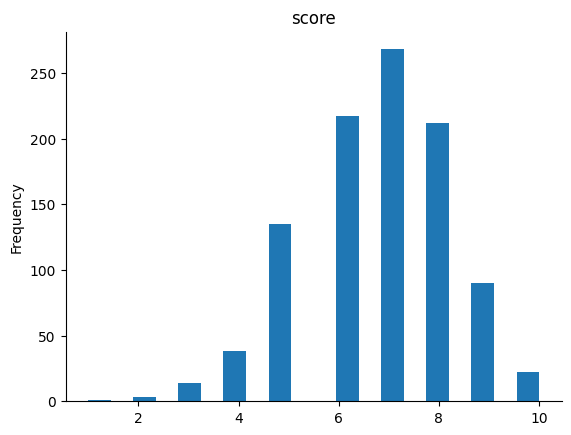

In [ ]:
# @title score

from matplotlib import pyplot as plt
students_df['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

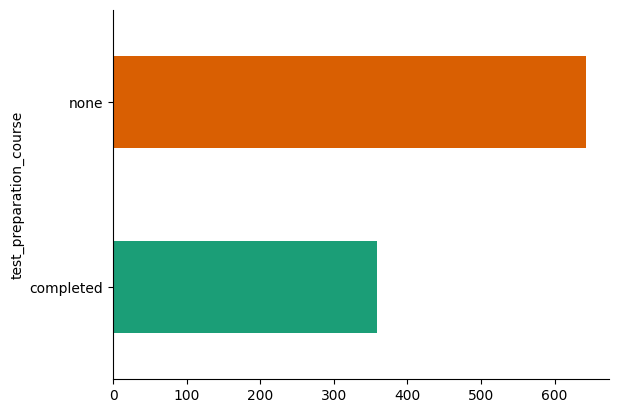

In [ ]:
# @title test_preparation_course

from matplotlib import pyplot as plt
import seaborn as sns
students_df.groupby('test_preparation_course').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

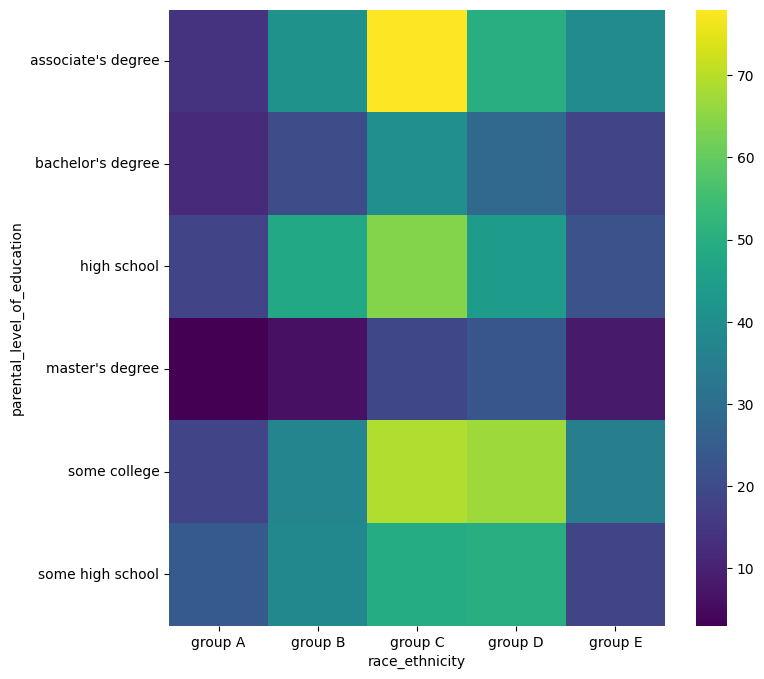

In [ ]:
# @title race_ethnicity vs parental_level_of_education

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['parental_level_of_education'].value_counts()
    for x_label, grp in students_df.groupby('race_ethnicity')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('race_ethnicity')
_ = plt.ylabel('parental_level_of_education')

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(students_df[['test_preparation_course']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['test_preparation_course']))
students_df = pd.concat([students_df, encoded_df], axis=1)
students_df.drop('test_preparation_course' , axis= 1, inplace = True)
students_df

,race_ethnicity,parental_level_of_education,lunch,score,gender_female,gender_male,test_preparation_course_completed,test_preparation_course_none
0,group B,bachelor's degree,standard,7.0,1.0,0.0,0.0,1.0
1,group C,some college,standard,8.0,1.0,0.0,1.0,0.0
2,group B,master's degree,standard,9.0,1.0,0.0,0.0,1.0
3,group A,associate's degree,free/reduced,5.0,0.0,1.0,0.0,1.0
4,group C,some college,standard,8.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,9.0,1.0,0.0,1.0,0.0
996,group C,high school,free/reduced,6.0,0.0,1.0,0.0,1.0
997,group C,high school,free/reduced,6.0,1.0,0.0,1.0,0.0
998,group D,some college,standard,7.0,1.0,0.0,1.0,0.0


In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(students_df[['lunch']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['lunch']))
students_df = pd.concat([students_df, encoded_df], axis=1)
students_df.drop('lunch' , axis= 1, inplace = True)
students_df

,race_ethnicity,parental_level_of_education,score,gender_female,gender_male,test_preparation_course_completed,test_preparation_course_none,lunch_free/reduced,lunch_standard
0,group B,bachelor's degree,7.0,1.0,0.0,0.0,1.0,0.0,1.0
1,group C,some college,8.0,1.0,0.0,1.0,0.0,0.0,1.0
2,group B,master's degree,9.0,1.0,0.0,0.0,1.0,0.0,1.0
3,group A,associate's degree,5.0,0.0,1.0,0.0,1.0,1.0,0.0
4,group C,some college,8.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,9.0,1.0,0.0,1.0,0.0,0.0,1.0
996,group C,high school,6.0,0.0,1.0,0.0,1.0,1.0,0.0
997,group C,high school,6.0,1.0,0.0,1.0,0.0,1.0,0.0
998,group D,some college,7.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(students_df[['race_ethnicity']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['race_ethnicity']))
students_df = pd.concat([students_df, encoded_df], axis=1)
students_df.drop('race_ethnicity' , axis= 1, inplace = True)
students_df

,parental_level_of_education,score,gender_female,gender_male,test_preparation_course_completed,test_preparation_course_none,lunch_free/reduced,lunch_standard,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E
0,bachelor's degree,7.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,some college,8.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,master's degree,9.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,associate's degree,5.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,some college,8.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,master's degree,9.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,high school,6.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
997,high school,6.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,some college,7.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
students_df['parental_level_of_education'].value_counts()

,count
parental_level_of_education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_categories = ['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree']
encoder = OrdinalEncoder(categories=[ordinal_categories])
encoded_data = encoder.fit_transform(students_df[['parental_level_of_education']])
df_encoded = pd.DataFrame(encoded_data, columns=['parental_level_of_education_encoded'])
students_df = pd.concat([students_df, df_encoded], axis=1)
students_df.drop('parental_level_of_education', axis=1, inplace=True)
students_df

,score,gender_female,gender_male,test_preparation_course_completed,test_preparation_course_none,lunch_free/reduced,lunch_standard,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_encoded
0,7.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0
1,8.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
2,9.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0
3,5.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
4,8.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0
996,6.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,6.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
998,7.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0


**Marchine Learnig**

In [ ]:
from  sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
X = students_df.drop('score', axis=1)
y = students_df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train

,gender_female,gender_male,test_preparation_course_completed,test_preparation_course_none,lunch_free/reduced,lunch_standard,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_encoded
108,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
134,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
585,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
42,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0
990,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
772,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
824,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
207,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


                                        score  gender_female  gender_male  \
score                                1.000000       0.125351    -0.125351   
gender_female                        0.125351       1.000000    -1.000000   
gender_male                         -0.125351      -1.000000     1.000000   
test_preparation_course_completed    0.255388      -0.006028     0.006028   
test_preparation_course_none        -0.255388       0.006028    -0.006028   
lunch_free/reduced                  -0.285958       0.021372    -0.021372   
lunch_standard                       0.285958      -0.021372     0.021372   
race_ethnicity_group A              -0.103861      -0.071001     0.071001   
race_ethnicity_group B              -0.087157       0.028466    -0.028466   
race_ethnicity_group C              -0.024579       0.063368    -0.063368   
race_ethnicity_group D               0.056753      -0.030566     0.030566   
race_ethnicity_group E               0.144864      -0.020302     0.020302   

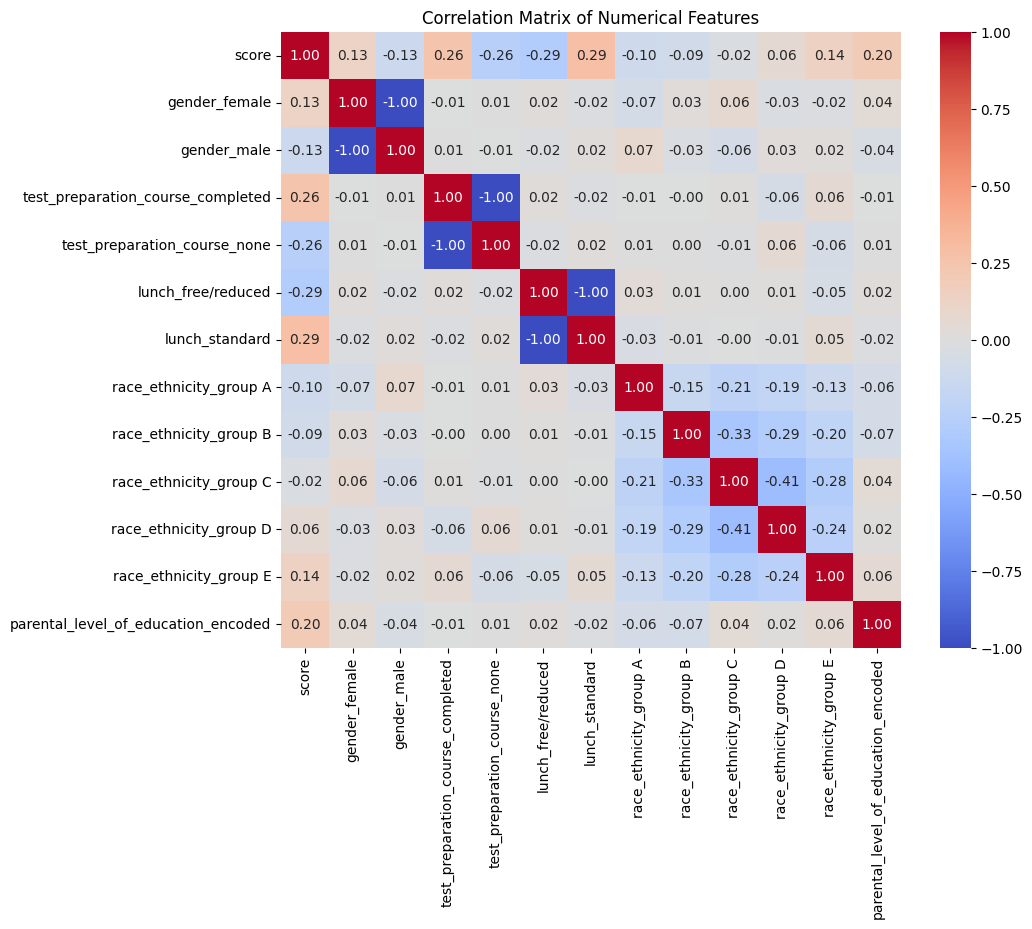

In [ ]:
# prompt: tabla  Correlation Of Numerical Features de los datos de score de cada uno de los estudiantes del  csv

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = students_df.corr()

# Display the correlation matrix as a table
print(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

In [ ]:
rf_mse = mean_squared_error(y_test, rf_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

print(f"Random Forest MSE: {rf_mse}")
print(f"Linear Regression MSE: {lr_mse}")

Random Forest MSE: 2.1111821968463818
Linear Regression MSE: 1.6566767503015434


In [ ]:
print('\n Sample predictions:')
num_samples = 5
for i in range(num_samples):
    print(f"   -  Ramdon Forest: {rf_predictions[i]}, Actual: {y_test.iloc[i]}")
    print(f"   -  Linear Regression: Predicted {lr_predictions[i]}, Actual: {y_test.iloc[i]} \n")


 Sample predictions:
   -  Ramdon Forest: 7.105639999706178, Actual: 9.0
   -  Linear Regression: Predicted 6.848710611428878, Actual: 9.0 

   -  Ramdon Forest: 5.7174047619047625, Actual: 4.0
   -  Linear Regression: Predicted 6.03841315874034, Actual: 4.0 

   -  Ramdon Forest: 4.800849206349207, Actual: 7.0
   -  Linear Regression: Predicted 5.5094295690949044, Actual: 7.0 

   -  Ramdon Forest: 5.292177170868347, Actual: 5.0
   -  Linear Regression: Predicted 6.397192895321913, Actual: 5.0 

   -  Ramdon Forest: 6.437789377289376, Actual: 6.0
   -  Linear Regression: Predicted 5.702231358474241, Actual: 6.0 



In [ ]:
rf_predictions = rf_model.predict(X_test).round()
lr_predictions = lr_model.predict(X_test).round()

rf_mse = mean_squared_error(y_test, rf_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

print(f"Random Forest MSE: {rf_mse}")
print(f"Linear Regression MSE: {lr_mse}")

print('\n Sample predictions:')
num_samples = 5
for i in range(num_samples):
    print(f"   -  Ramdon Forest: Predicted: {rf_predictions[i]}, Actual: {y_test.iloc[i]}")
    print(f"   -  Linear Regression: Predicted {lr_predictions[i]}, Actual: {y_test.iloc[i]} \n")

Random Forest MSE: 2.225
Linear Regression MSE: 1.81

 Sample predictions:
   -  Ramdon Forest: Predicted: 7.0, Actual: 9.0
   -  Linear Regression: Predicted 7.0, Actual: 9.0 

   -  Ramdon Forest: Predicted: 6.0, Actual: 4.0
   -  Linear Regression: Predicted 6.0, Actual: 4.0 

   -  Ramdon Forest: Predicted: 5.0, Actual: 7.0
   -  Linear Regression: Predicted 6.0, Actual: 7.0 

   -  Ramdon Forest: Predicted: 5.0, Actual: 5.0
   -  Linear Regression: Predicted 6.0, Actual: 5.0 

   -  Ramdon Forest: Predicted: 6.0, Actual: 6.0
   -  Linear Regression: Predicted 6.0, Actual: 6.0 



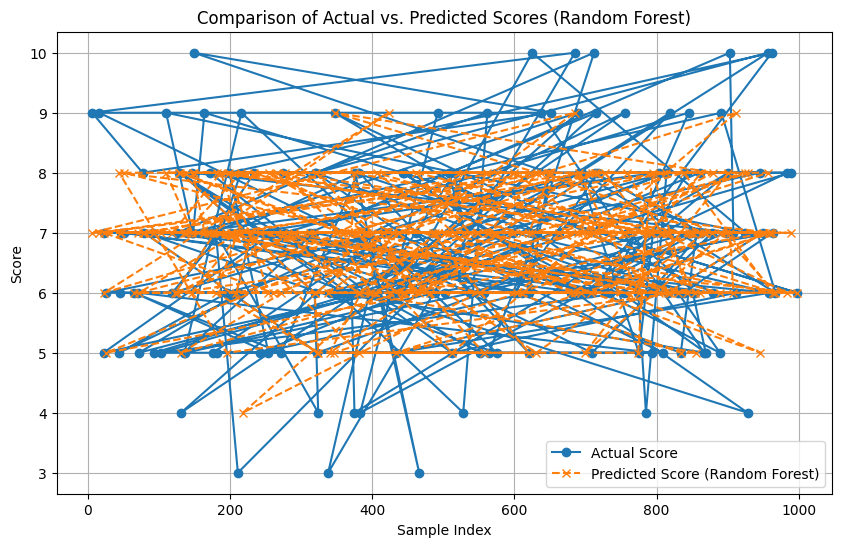

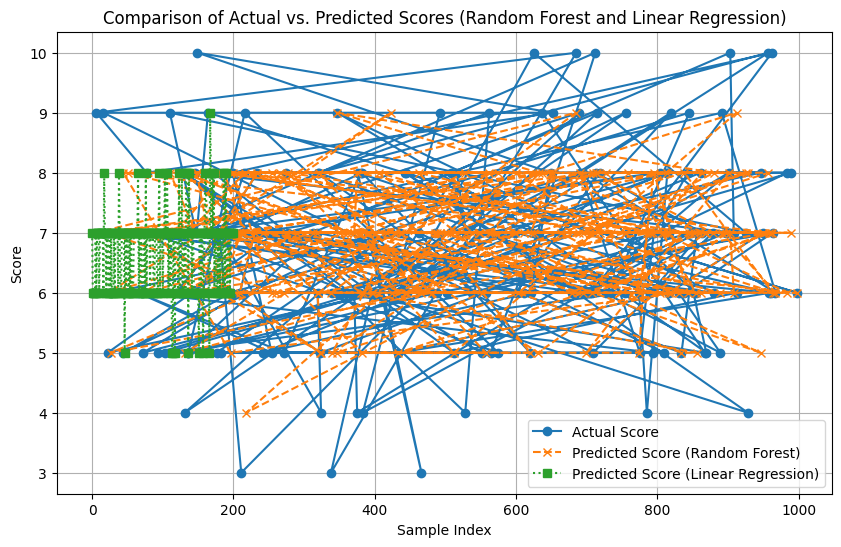

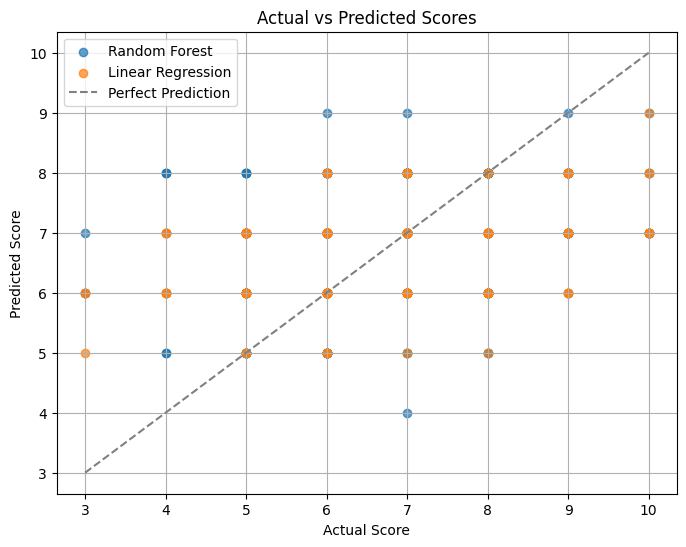

In [ ]:
# visualizacion de los datos com parados con el score a con los futuros score que se podra sacar dependiendode los modelos

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'rf_predictions' are already defined from your code.
# Create a DataFrame for easier plotting
results_df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score (Random Forest)': rf_predictions})

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['Actual Score'], label='Actual Score', marker='o', linestyle='-')
plt.plot(results_df['Predicted Score (Random Forest)'], label='Predicted Score (Random Forest)', marker='x', linestyle='--')

plt.xlabel('Sample Index')
plt.ylabel('Score')
plt.title('Comparison of Actual vs. Predicted Scores (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

# Optional:  Add Linear Regression predictions to the plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['Actual Score'], label='Actual Score', marker='o', linestyle='-')
plt.plot(results_df['Predicted Score (Random Forest)'], label='Predicted Score (Random Forest)', marker='x', linestyle='--')
plt.plot(lr_predictions, label='Predicted Score (Linear Regression)', marker='s', linestyle=':') # Assuming lr_predictions is available

plt.xlabel('Sample Index')
plt.ylabel('Score')
plt.title('Comparison of Actual vs. Predicted Scores (Random Forest and Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()


# Optional: Scatter plot to show the relationship between actual and predicted scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, label='Random Forest', alpha=0.7)
plt.scatter(y_test, lr_predictions, label='Linear Regression', alpha=0.7)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Scores")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Perfect Prediction') # Add a diagonal line for reference
plt.legend()
plt.grid(True)
plt.show()


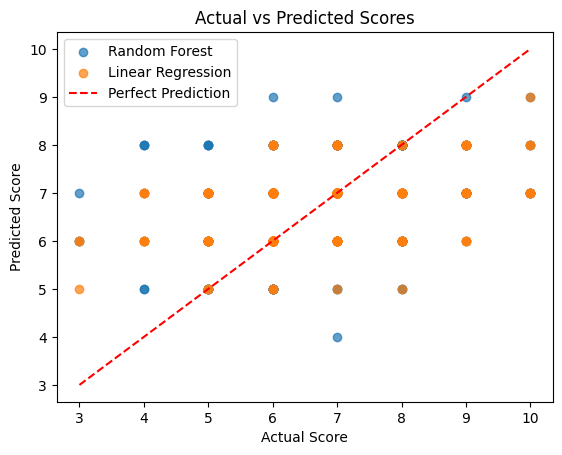

In [ ]:
# prompt: los resultado optenidos por la prediciones hechas de los modelos en regresion lineal

import matplotlib.pyplot as plt

# Create a figure and an axes
fig, ax = plt.subplots()

# Plot the actual vs predicted values for Random Forest
ax.scatter(y_test, rf_predictions, label='Random Forest', alpha=0.7)

# Plot the actual vs predicted values for Linear Regression
ax.scatter(y_test, lr_predictions, label='Linear Regression', alpha=0.7)


# Add labels and title
ax.set_xlabel('Actual Score')
ax.set_ylabel('Predicted Score')
ax.set_title('Actual vs Predicted Scores')

# Add a diagonal line for reference
min_val = min(min(y_test), min(rf_predictions), min(lr_predictions))
max_val = max(max(y_test), max(rf_predictions), max(lr_predictions))

ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

# Add a legend
ax.legend()

# Show the plot
plt.show()


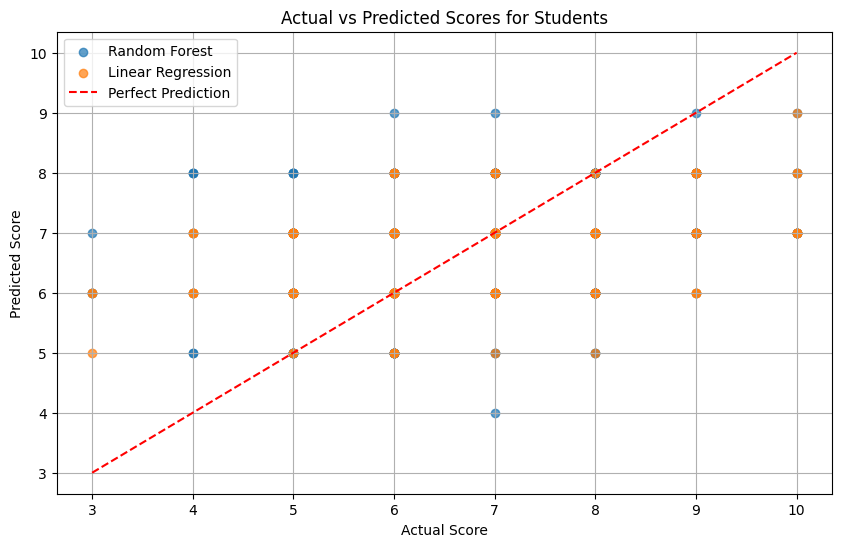

Linear Regression model is better for predicting final scores.


In [ ]:
# prompt: en un grafica con regresion logistica como fue el resultado de los score de los estudiantes de cada uno y cual modelo es mejor para predecir sus finales

# Assuming rf_predictions and lr_predictions are already calculated as in your provided code.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, label='Random Forest', alpha=0.7)
plt.scatter(y_test, lr_predictions, label='Linear Regression', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Scores for Students')
plt.legend()
plt.grid(True)
plt.show()


# Determine the better model based on MSE (lower MSE is better).
if rf_mse < lr_mse:
    print("Random Forest model is better for predicting final scores.")
else:
    print("Linear Regression model is better for predicting final scores.")


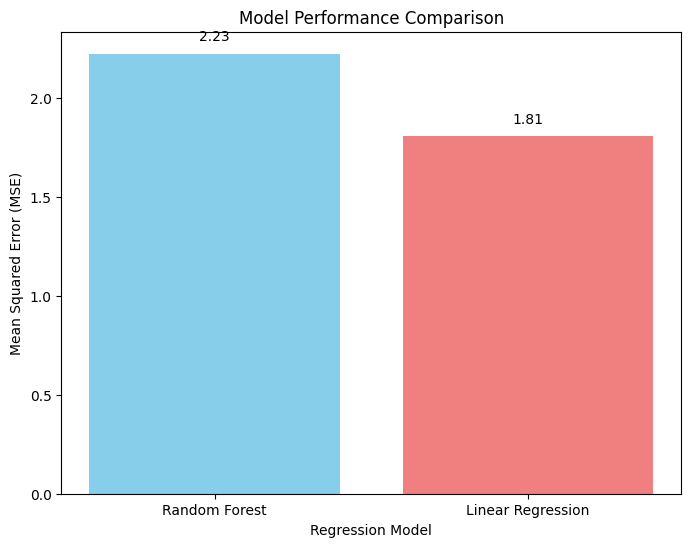

In [ ]:
# prompt: desempeño del score que se calculo con los modelos de regresion logistica y como este puede predecir los futuros resultados

import matplotlib.pyplot as plt

# Sample data (replace with your actual model performance data)
models = ['Random Forest', 'Linear Regression']
mse_scores = [rf_mse, lr_mse]  # Use the calculated MSE values from your code

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, mse_scores, color=['skyblue', 'lightcoral'])
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Performance Comparison')

# Add value labels on top of the bars
for i, v in enumerate(mse_scores):
    plt.text(i, v + 0.05, str(round(v, 2)), ha='center', va='bottom')


plt.show()
